In [52]:
import pandas as pd
import numpy as np
import os
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
#url = "https://raw.githubusercontent.com/adam-datasci/RiskAnalytics/main/Data/american_bankruptcy.csv?"
url = "Data/american_bankruptcy_normalized.csv"
df = pd.read_csv(url)

In [54]:
industry_summary = df.groupby('Division')['company_name'].nunique().reset_index().rename(columns={'company_name': 'Count'})
industry_summary = industry_summary.sort_values(by='Count', ascending=False)

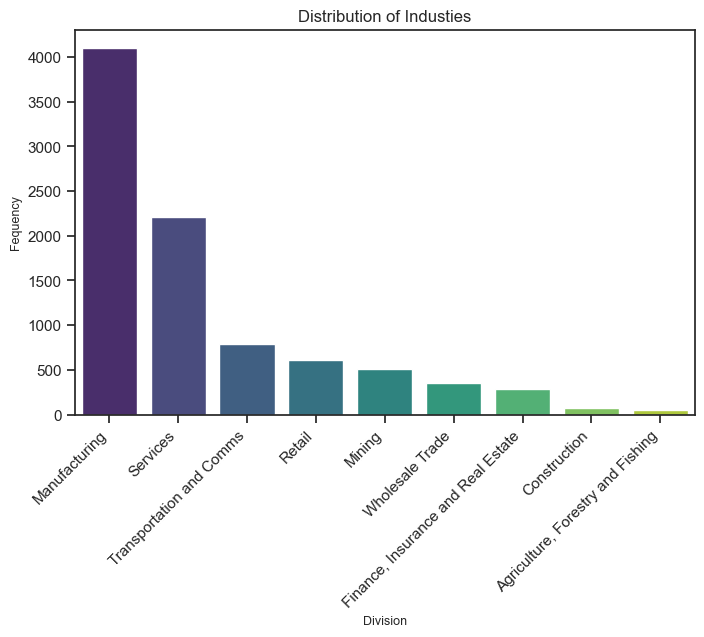

In [55]:
# Create a figure and axis
plt.figure(figsize=(8, 5))

# Create a bar chart
bar_plot = sns.barplot(x='Division', y='Count', data=industry_summary, palette='viridis')

# Add labels and title
plt.xlabel('Division', fontsize=9)
plt.ylabel('Fequency', fontsize=9)
plt.title('Distribution of Industies', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.show()


Filter data by industry and ratios

In [56]:
features = ['wc_to_ta_pct','re_to_ta_pct','ebit_to_ta_pct','mv_to_tl_pct','tr_to_ta_pct','tltd_to_te_pct','np_to_tr_pct','ebitda_to_tr_pct','gp_to_tr_pct','ca_to_cl_pct','np_to_ta_pct','default']
features = ['np_to_tr_pct','ebitda_to_tr_pct','gp_to_tr_pct','tltd_to_te_pct','mv_to_tl_pct','Division','default']
#features = ['np_to_tr','ebitda_to_tr','gp_to_tr','Division']
industries = ['Agriculture','Mining','Construction','Manufacturing','Transportation','Wholesale','Retail','Finance','Services','Public']
industries = ['Manufacturing','Wholesale Trade','Services']

df_filtered = df[df['Division'].isin(industries)]
df_filtered = df_filtered[features]

Create balance data set of defaulters vs non-defaulters and a general sample

In [57]:
#Create a sample of a specific size for the filtered data
sample_size = 1000
df_filtered_sample = df_filtered.sample(sample_size, random_state=1)

#pull out both the default and non-default periods
default_periods = df_filtered[df['default'] == 1]
non_default_periods = df_filtered[df['default'] == 0]
no_rows = default_periods.shape[0]

#Create a balanced dataset
df_sample_non_default = non_default_periods.sample(no_rows, random_state=1)
df_balanced = pd.concat([default_periods, df_sample_non_default])


#df_balanced_by_division = df_balanced_features.melt(id_vars='Division', value_vars=features[:-1],var_name='ratio_name',value_name='ratio_value')

C:\Users\adamk\AppData\Local\Temp\ipykernel_30796\456415926.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  default_periods = df_filtered[df['default'] == 1]
C:\Users\adamk\AppData\Local\Temp\ipykernel_30796\456415926.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  non_default_periods = df_filtered[df['default'] == 0]


Create a graph comparing ratios across industries

<Axes: xlabel='ratio_name', ylabel='ratio_value'>

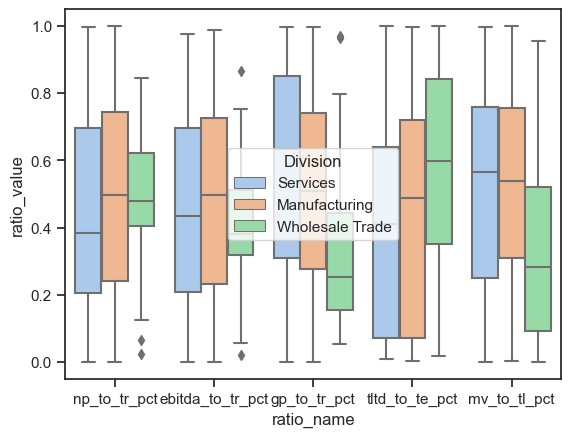

In [58]:
df_filtered_sample_by_divsion = df_filtered_sample.melt(id_vars='Division', value_vars=features[:-2],var_name='ratio_name',value_name='ratio_value')

sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x='ratio_name', y='ratio_value', hue='Division', data=df_filtered_sample_by_divsion)

In [61]:
df_filtered_sample_by_status = df_balanced.melt(id_vars='default', value_vars=features[:-1],var_name='ratio_name',value_name='ratio_value')

sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x='ratio_name', y='ratio_value', hue='default', data=df_filtered_sample_by_status)

KeyError: "The following id_vars or value_vars are not present in the DataFrame: ['default']"

                wc_to_ta_pct  re_to_ta_pct  ebit_to_ta_pct  mv_to_tl_pct  \
wc_to_ta_pct        1.000000      0.265204        0.158587      0.510421   
re_to_ta_pct        0.265204      1.000000        0.638058      0.189804   
ebit_to_ta_pct      0.158587      0.638058        1.000000      0.156725   
mv_to_tl_pct        0.510421      0.189804        0.156725      1.000000   
default            -0.343345     -0.346368       -0.345938     -0.508354   

                 default  
wc_to_ta_pct   -0.343345  
re_to_ta_pct   -0.346368  
ebit_to_ta_pct -0.345938  
mv_to_tl_pct   -0.508354  
default         1.000000  


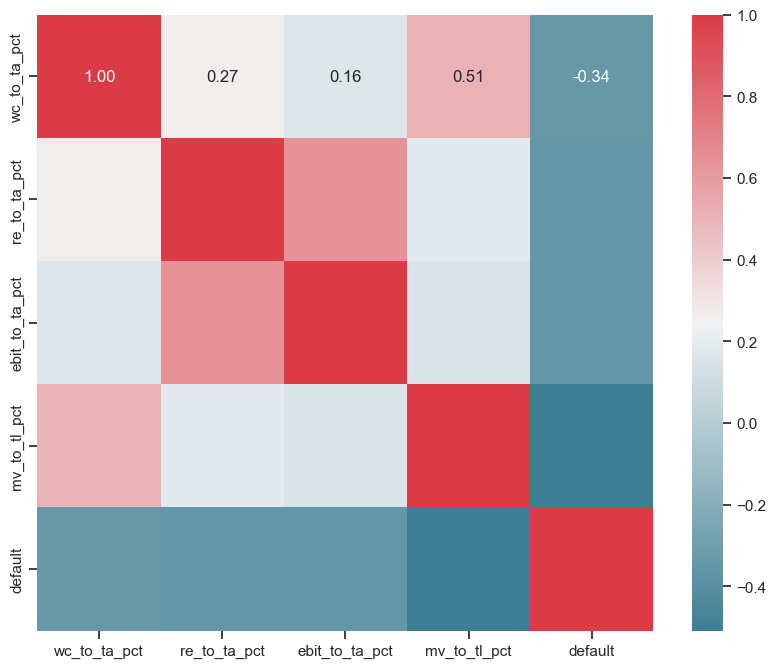

In [ ]:
# Load data and compute correlation
corr = df_balanced_features.corr().astype(float)  # Ensure float type
print(corr)  # Check the output

# Ensure the index is standard if necessary
# corr.reset_index(drop=True, inplace=True)

# Plotting
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)
plt.show()